In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
#date = datetime.datetime.today().strftime('%Y-%m-%d')
#date  = '2019-12-27'
date = '2020-01-20'
filename = 'oteann_results_'+date+'.csv'
df_results = pd.read_csv(filename)
print(filename)

oteann_results_2020-01-20.csv


In [3]:
#df_results.drop(df_results.tail(X).index,inplace=True)
df_results.shape

(102, 39)

In [4]:
df_results.tail(10)

,date,time,lang,task,lstm,word_len_mean,pronunciation_len_mean,nb_samples,max_len_input,max_len_target,...,test_err_2_label,test_err_2_nb,test_err_2_word,test_err_2_pronunciation,test_err_2_prediction,test_err_3_label,test_err_3_nb,test_err_3_word,test_err_3_pronunciation,test_err_3_prediction
92,2020-01-23,21:24:30,nl,write,512,8.6,7.8,13344,24,26,...,w:-.+.t.,14,bloed,blut,bloedt,w:-.+.s.,10,gedagis,ɣədaɣis,gedagiss
93,2020-01-23,22:10:27,nl,read,512,8.6,7.8,13344,25,25,...,r:-.ː.+.,9,knaag,knaːx,knax,r:-.e.+.ə.,8,peroesj,peruʃ,pəruʃ
94,2020-01-23,22:56:05,pt,write,512,7.1,7.0,13722,20,23,...,w:-.e.+.i.,15,revisão,ʁivizɐ̃w̃,rivisão,w:-.u.+.o.,13,testemunho,tɨʃtɨmuɲu,testemonho
95,2020-01-23,23:36:45,pt,read,512,7.1,7.0,13722,22,21,...,r:-.o.+.u.,31,conciso,kõsizo,kõsizu,r:-.a.+.ɐ.,24,virilha,viɾiʎa,viɾiʎɐ
96,2020-01-24,00:05:39,ru,write,512,10.7,10.5,304525,27,26,...,w:-.о.+.а.,34,зачокавшийся,zətɕɪkəfʂɨjsə,зачакавшийся,w:-.е.+.и.,31,клейстерный,klɪjstɪrnɨj,клейстирный
97,2020-01-24,00:58:29,ru,read,512,10.7,10.5,304525,25,28,...,r:-.+.t.,4,ленаит,lɪnəɪt,lɪnəɪtt,r:-.+.ə.,4,стращая,strəɕɪjə,strəɕɪjəə
98,2020-01-24,01:50:55,sh,write,512,8.9,9.1,98576,24,24,...,w:-.i.+.s.,2,hebreistički,xebreǐstitʃki,hebresstički,w:-.z.+.v.,2,pravoslavizacija,praʋoslaʋizǎtsija,pravoslavivacija
99,2020-01-24,02:37:10,sh,read,512,8.9,9.1,98576,23,25,...,r:-.â.+.ǎ.,19,spasenik,spâsenik,spǎsenik,r:-.ô.+.ǒ.,18,robau,rôbau,rǒbau
100,2020-01-24,03:29:34,tr,write,512,10.1,10.3,117850,27,26,...,w:-.ğ.+.,5,mağşuş,maʃʊʃ,maşuş,w:-.k.+.l.,3,horozkarası,hoɾɔzkaɾasɯ,horozlarası
101,2020-01-24,04:37:24,tr,read,512,10.1,10.3,117850,25,28,...,r:-.ʊ.+.a.,2,hükmolunmak,høcmoɫʊnmak,høcmoɫanmak,r:-.t.+.s.,2,serbestlik,sɛrbɛstlɪk,sɛrbɛsslɪk


In [5]:
tasks  = df_results.task.unique()
tasks

array(['write', 'read'], dtype=object)

In [6]:
df_results.columns

Index(['date', 'time', 'lang', 'task', 'lstm', 'word_len_mean',
       'pronunciation_len_mean', 'nb_samples', 'max_len_input',
       'max_len_target', 'nb_input_symbols', 'nb_output_symbols', 'x_symbols',
       'y_symbols', 'x_nb_symbols', 'y_nb_symbols', 'trainable_params',
       'training_duration', 'val_accuracy', 'nb_predictions',
       'nb_good_predictions', 'test_err_index', 'test_accuracy',
       'test_duration', 'test_err_1_label', 'test_err_1_nb', 'test_err_1_word',
       'test_err_1_pronunciation', 'test_err_1_prediction', 'test_err_2_label',
       'test_err_2_nb', 'test_err_2_word', 'test_err_2_pronunciation',
       'test_err_2_prediction', 'test_err_3_label', 'test_err_3_nb',
       'test_err_3_word', 'test_err_3_pronunciation', 'test_err_3_prediction'],
      dtype='object')

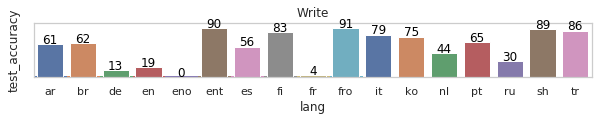

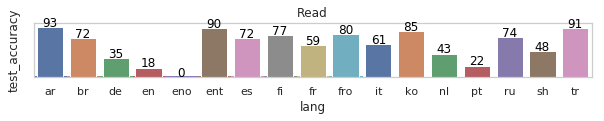

In [7]:
def display_results(df):
    sns.set(style="whitegrid")
    current_palette = sns.color_palette()
    for task in tasks:
        df_o = df[df.task==task].sort_values(by='lang')
        df_o = df_o[['task', 'lang', 'test_accuracy']]
        df_o['test_accuracy']=df_o['test_accuracy']*100
        df_o = df_o.groupby('lang', as_index=False).mean()
        sns.palplot(current_palette)
        ax = sns.barplot(x="lang", y="test_accuracy",
                         data=df_o, palette=current_palette)
        # add the accuracy number on the top of each bar
        i=0
        for index, row in df_o.iterrows():
            ax.text(i, row.test_accuracy+1, str(round(row.test_accuracy)), color='black', ha="center")
            i+=1
        plt.title(task.capitalize())
        plt.ylim(0, 100)
        plt.show()

display_results(df_results)

In [8]:
nb_tasks = len(df_results.task.unique())
nb_langs = len(df_results.lang.unique())

In [9]:
def display_history(df):
    for i, row in df.iterrows():
        print('test:%d, LANG=%s' % (i, row.lang))
        for column in df.columns:
            print('%s:%s' % (column, str(row[column])))
        print('=================================================')
display_history(df_results.head(nb_tasks*nb_langs))

test:0, LANG=eno
date:2020-01-20
time:17:58:59
lang:eno
task:write
lstm:512
word_len_mean:7.3
pronunciation_len_mean:7.3
nb_samples:42217
max_len_input:28
max_len_target:29
nb_input_symbols:42
nb_output_symbols:52
x_symbols:a, b, d, e, f, h, i, j, k, l, m, n, o, p, s, t, u, v, w, x, z, æ, ð, ŋ, ɑ, ɒ, ɔ, ə, ɚ, ɛ, ɡ, ɪ, ɲ, ɵ, ɹ, ʃ, ʊ, ʌ, ʍ, ʒ, ː, θ
y_symbols:a, b, d, e, f, h, i, j, k, l, m, n, o, p, r, s, t, u, v, w, x, z, æ, ð, ŋ, ɑ, ɒ, ɔ, ə, ɚ, ɛ, ɝ, ɡ, ɨ, ɪ, ɫ, ɲ, ɵ, ɹ, ɾ, ʃ, ʉ, ʊ, ʌ, ʍ, ʒ, ʔ, ʰ, ː, θ
x_nb_symbols:42
y_nb_symbols:50
trainable_params:2325045
training_duration:0:14:15.647594
val_accuracy:0.752
nb_predictions:1000
nb_good_predictions:0
test_err_index:[0.    0.981 0.019 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
test_accuracy:0.0
test_duration:0:02:34.607521
test_err_1_label:w:-.o.o.v.z.+.ð.ɚ.l.d.
test_err_1_nb:1
test_err_1_word:oolvz
test_err_1_pronunciatio

In [10]:
# Calculate min, mean, max
df = df_results
df['test_accuracy']=df['test_accuracy']*100
for task in df['task'].unique(): 
    df_i = df[df['task'] == task]    
    df_i = df_i[['lang','test_accuracy']]
    print(df_i.groupby('lang').agg({'test_accuracy': ['min', 'mean', 'max', 'count', 'std']}))


     test_accuracy                                 
               min       mean   max count       std
lang                                               
ar            58.0  61.333333  67.0     3  4.932883
br            60.0  62.333333  65.0     3  2.516611
de            10.0  13.000000  18.0     3  4.358899
en            17.0  19.000000  21.0     3  2.000000
eno            0.0   0.000000   0.0     3  0.000000
ent           90.0  90.000000  90.0     3  0.000000
es            54.0  56.333333  58.0     3  2.081666
fi            82.0  82.666667  83.0     3  0.577350
fr             3.0   3.666667   4.0     3  0.577350
fro           90.0  91.000000  92.0     3  1.000000
it            78.0  78.666667  79.0     3  0.577350
ko            74.0  74.666667  76.0     3  1.154701
nl            43.0  44.000000  46.0     3  1.732051
pt            64.0  65.333333  67.0     3  1.527525
ru            28.0  30.333333  32.0     3  2.081666
sh            87.0  88.666667  90.0     3  1.527525
tr          

Text(0.5, 1.0, 'Write')

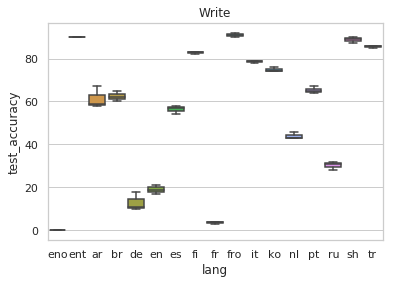

In [11]:
ax = sns.boxplot(x='lang', y='test_accuracy', data=df[df.task=='write'])
ax.set_title('Write')

Text(0.5, 1.0, 'Read')

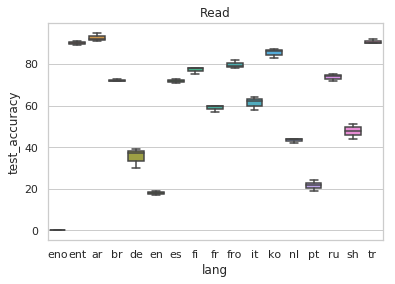

In [12]:
ax = sns.boxplot(x='lang', y='test_accuracy', data=df[df.task=='read'])
ax.set_title('Read')